# Heteromotility Unsupervised Clustering

In [2]:
# Load Heteromotility analysis tools
source('../../analysis/hm_common_fnx.R')

In [61]:
# Import data from simulations
rw = read.csv('../../demo/motility_statistics_rw.csv')
pf = read.csv('../../demo/motility_statistics_pf.csv')

In [63]:
# remove id.vars, remove turning features, scale data
df = rbind(rw, pf)
df.class = c(rep('RW', nrow(rw)), rep('PF', nrow(pf))) # class labels

df = df[,3:57] # remove id.vars & turning features
df = data.frame(scale(df))

In [64]:
# Perform PCA and generate PCA plots
# these operations are wrapped in the `pca_plots` function, 
# which generates plots and saves them to a directory
# here we perform them in-line to show plots in the notebook

require(ggplot2)
# PCA
df.pca_eigens <- prcomp(df)
df.comp <- data.frame(df.pca_eigens$x[,1:30])

pca_theme <- theme(axis.text.x=element_blank(),
                 axis.text.y=element_blank(),
                 axis.ticks=element_blank(),
                 legend.position="right",
                 panel.background=element_blank(),
                 panel.border=element_blank(),
                 panel.grid.major=element_blank(),
                 panel.grid.minor=element_blank(),
                 plot.background=element_blank())
pca_class <- ggplot(df.comp, aes(x = PC1, y = PC2, col = as.factor(df.class))) + geom_point(size=1) + pca_theme + scale_colour_discrete(name = "Class")

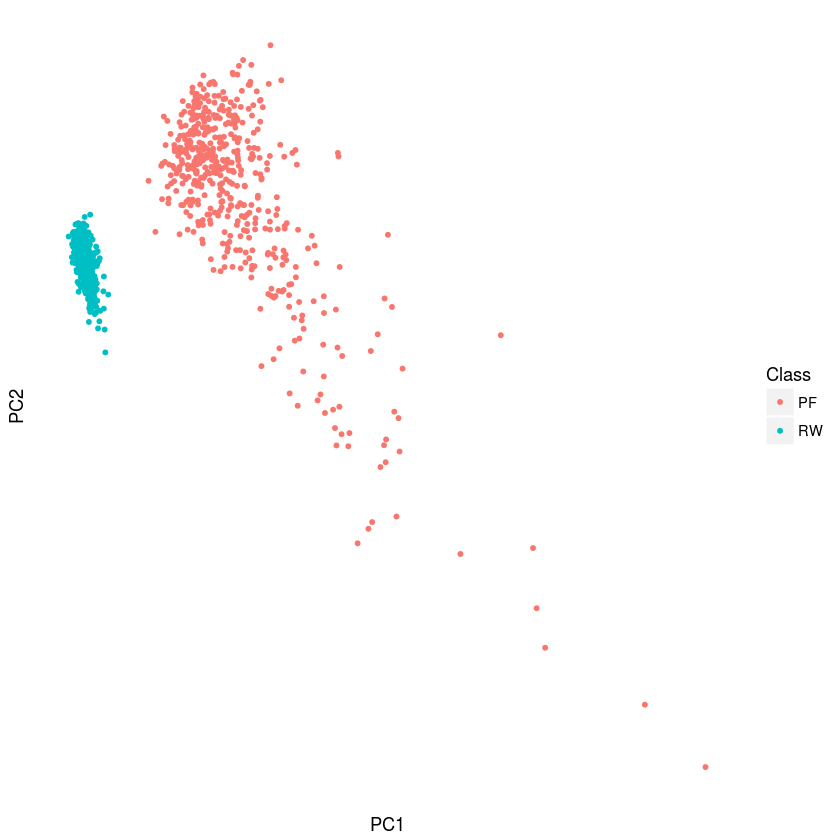

In [65]:
pca_class

We see the data separate nicely along PC1! Let's see what features contribute to that separation by looking at the PC loadings.

In [77]:
# PC loadings
pca_loadings = function(df, pc=1){
    df.pc <- princomp(df)
    aload <- abs( with(df.pc, unclass(loadings)) ) # get abs of all loadings
    pload <- sweep(aload, 2, colSums(aload), "/") # proportion per PC
    features <- tail(sort(pload[,pc], decreasing = F), 20) # top 20 loadings in PC1, get names with labels()
    return(features)
}

data.frame(pca_loadings(df, pc=1))

,pca_loadings.df..pc...1.
time_moving02,0.02544026
time_moving06,0.02561763
max_speed,0.02572186
time_moving03,0.02582952
time_moving05,0.02585088
time_moving04,0.02592091
rw_kurtosis01,0.02603907
avg_moving_speed10,0.02719107
avg_moving_speed09,0.02768151
avg_moving_speed03,0.02777326


We see that the time spent moving, displacement higher moments (skew, kurtosis) and average moving speed are the largest contributors to separating the simulations on PC1.

Let's visualize with t-SNE for demonstration.

In [79]:
# These functions are wrapped in the hm_common_fnx `tsne_plots`
# Note, we use 30 PCs for TSNE visualization

no_axes_w_legend <- theme(axis.line=element_blank(),
                        axis.text.x=element_blank(),
                        axis.text.y=element_blank(),
                        axis.ticks=element_blank(),
                        axis.title.x=element_blank(),
                        axis.title.y=element_blank(),
                        legend.position="right",
                        panel.background=element_blank(),
                        panel.border=element_blank(),
                        panel.grid.major=element_blank(),
                        panel.grid.minor=element_blank(),
                        plot.background=element_blank())


require(Rtsne)
df.tsne = Rtsne(df.comp, perplexity = 50)

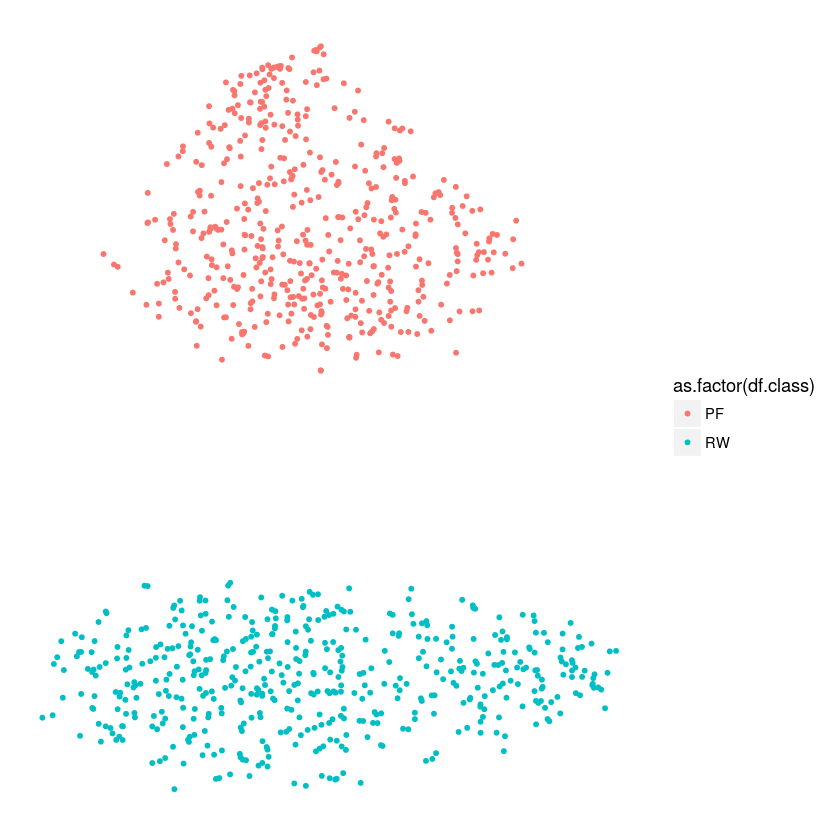

In [80]:
tsne_class <- ggplot(data.frame(df.tsne$Y), aes(x=X1, y=X2, col = as.factor(df.class))) + geom_point(size=1) + no_axes_w_legend
tsne_class

Let's apply hierarchical clustering to define two states.

In [81]:
df.groups = cutree(hclust(dist(df.comp, method='euclidean'), method='ward.D'), k = 2)

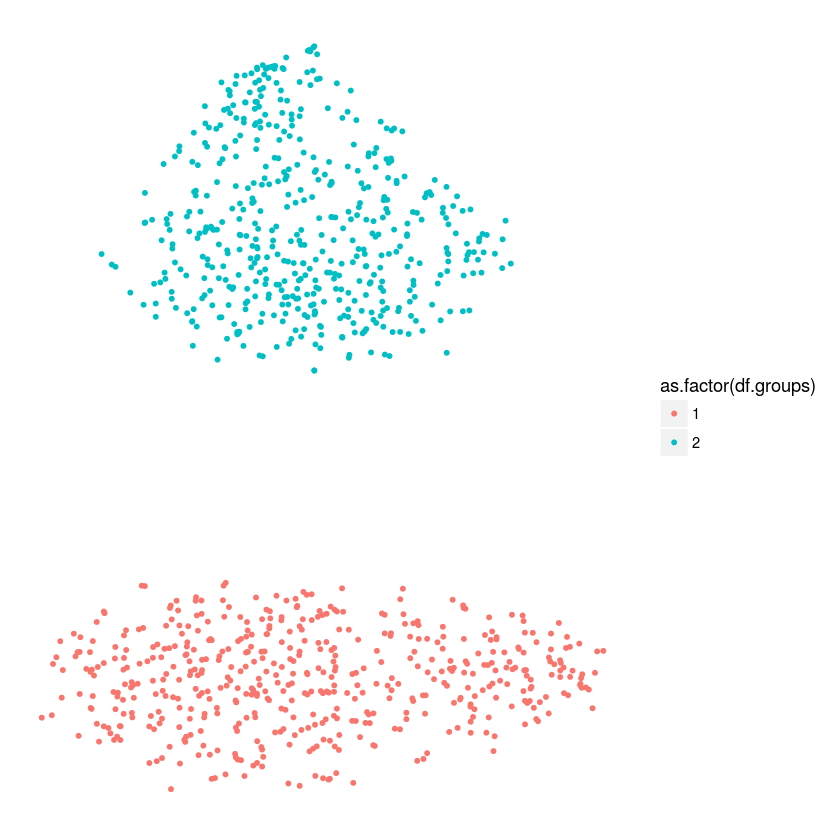

In [82]:
tsne_groups <- ggplot(data.frame(df.tsne$Y), aes(x=X1, y=X2, col = as.factor(df.groups))) + geom_point(size=1) + no_axes_w_legend
tsne_groups

We find that unsupervised hierarchical clustering using Ward's linkage correctly segregates the ground truth states!